This is the second version of my public kernel(Intrusion Detection System). ANN is also trained & tested on the dataset in this version.
I would really appreciate your feedback.

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


READING DATASET

In [6]:
df = pd.read_csv("intrusion_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
df.shape

(494021, 43)

In [4]:
# df.to_csv('intrusion_data.csv',index = False)

In [9]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [6]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [7]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [8]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [10]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

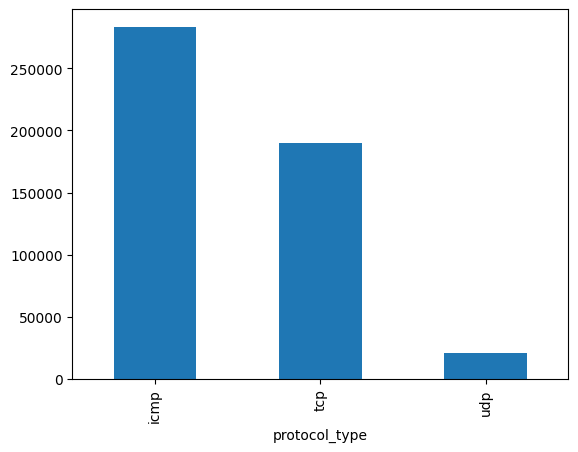

In [11]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

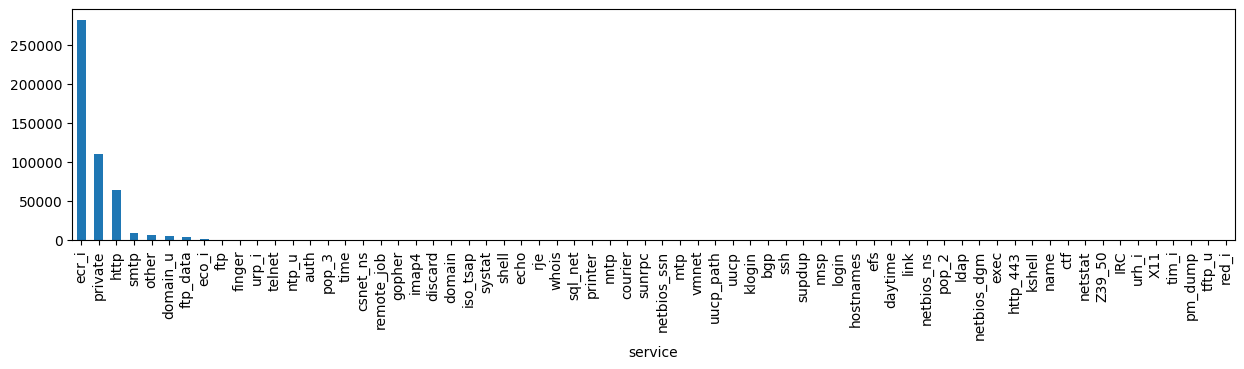

In [12]:
plt.figure(figsize=(15,3))
bar_graph('service')

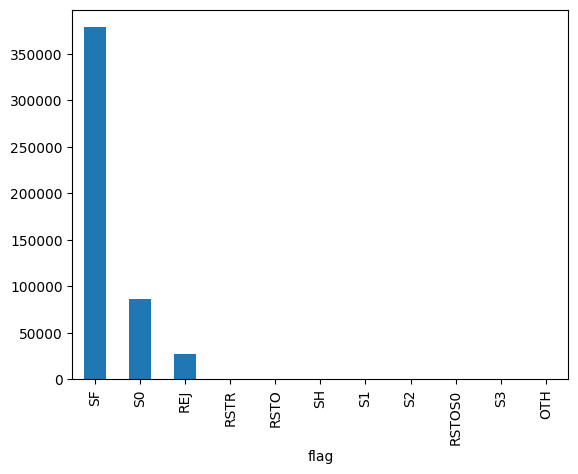

In [13]:
bar_graph('flag')

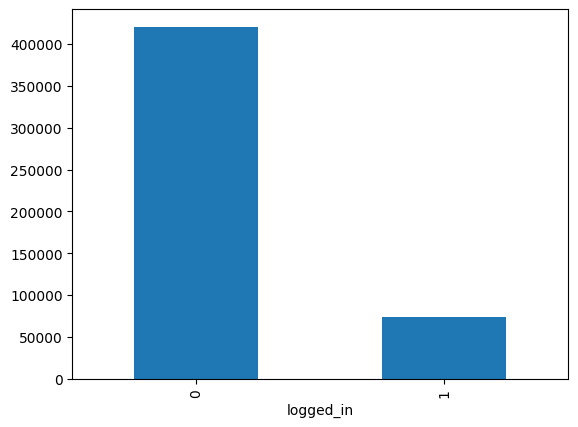

In [14]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

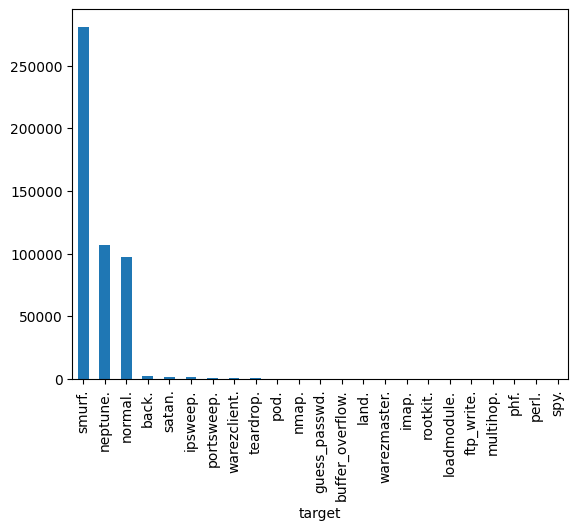

In [15]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

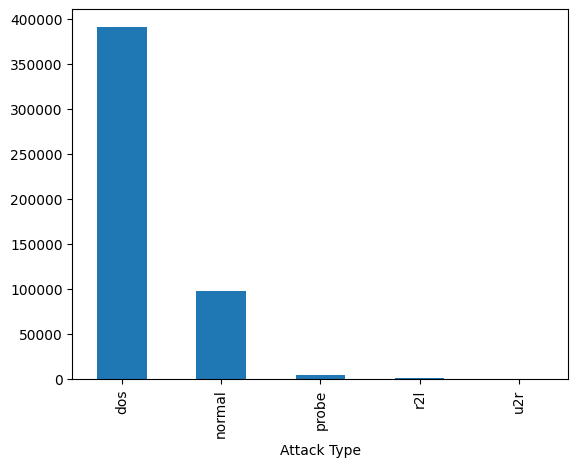

In [16]:
bar_graph('Attack Type')

In [17]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

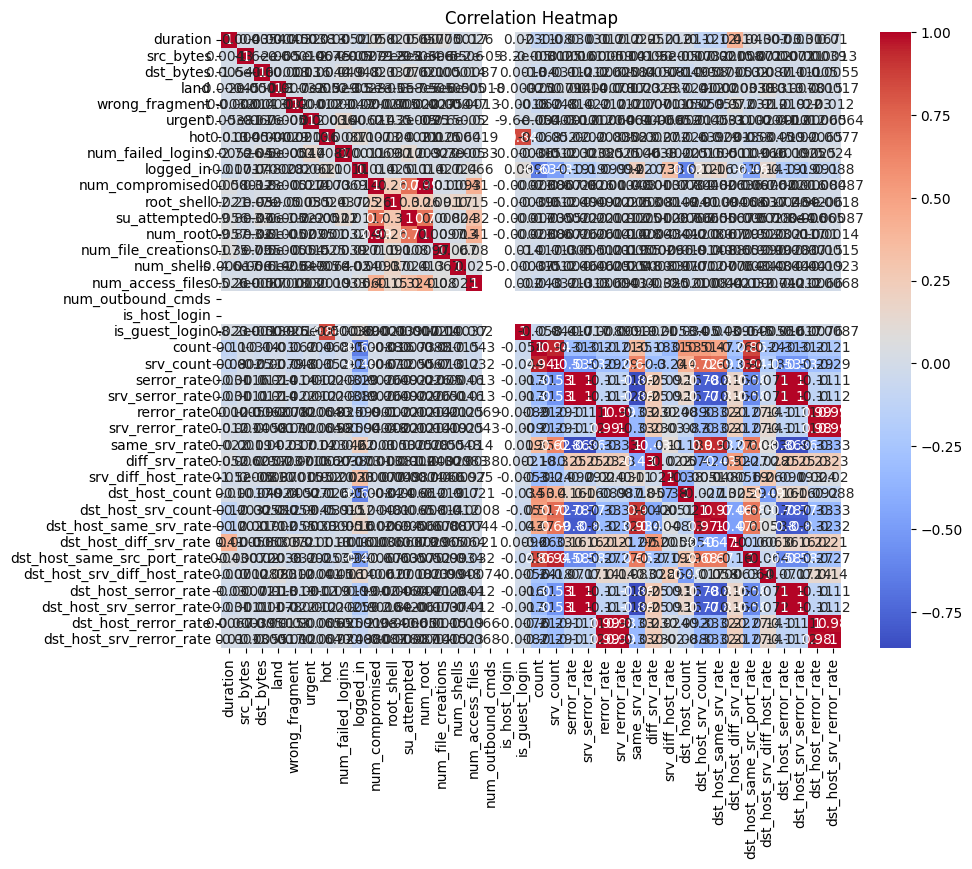

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined and loaded your DataFrame as 'df'

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738127

In [11]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725588

In [12]:
df['srv_count'].corr(df['count'])

0.9436670688882609

In [13]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818194

In [14]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953938

In [15]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373276

In [16]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110385

In [17]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691319

In [18]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323972

In [19]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783213

In [20]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105016

In [21]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373957

In [22]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679914

In [23]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091849968

In [24]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495607

In [25]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308442

In [26]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751448

In [27]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.986570543884572

In [28]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [29]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [30]:
df.shape

(494021, 35)

In [31]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

FEATURE MAPPING

In [32]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [33]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [34]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [35]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [36]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [37]:
df.drop('service',axis = 1,inplace= True)

In [38]:
df.shape

(494021, 34)

In [39]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [40]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

In [41]:
df = df.drop(['target',], axis=1)


MODELLING

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report

In [43]:
# print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)



(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [44]:
X_train

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
482186,1470,2,0,147,105,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,1,0.82,1.00,0.00
302290,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
9330,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
91417,6,1,0,2872,335,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,188,186,0.02,0.01,0.01
293169,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
365838,0,1,1,0,0,0,0,0,0,0,...,1.0,0.0,0.05,0.07,0.0,255,8,0.06,0.00,0.00
131932,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
146867,9141,2,0,147,105,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,3,0.41,0.84,0.00


In [45]:
X_test

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
317921,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
171422,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
312181,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
87346,0,1,0,345,5419,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,101,255,0.00,0.01,0.02
57449,0,1,1,0,0,0,0,0,0,0,...,1.0,0.0,0.01,0.06,0.0,255,2,0.07,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351572,0,1,1,0,0,0,0,0,0,0,...,1.0,0.0,0.02,0.06,0.0,255,19,0.06,0.00,0.00
378352,0,1,1,0,0,0,0,0,0,0,...,1.0,0.0,0.11,0.05,0.0,255,22,0.05,0.00,0.00
33349,0,1,0,219,2367,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00
119307,0,1,1,0,0,0,0,0,0,0,...,1.0,0.0,0.10,0.06,0.0,255,14,0.06,0.00,0.00


In [46]:
# X_test.to_csv('test.csv',index=False)

GAUSSIAN NAIVE BAYES

In [55]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [56]:
model1 = GaussianNB()

In [57]:
model1.fit(X_train, Y_train.values.ravel())

Y_test_pred1 = model1.predict(X_test)

print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))


Train score is: 0.8964603587980446
Test score is: 0.8966428873744839


DECISION TREE

In [58]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model2.fit(X_train, Y_train.values.ravel())

Y_test_pred2 = model2.predict(X_test)
Y_train_pred2 = model2.predict(X_train)


print('test accuracy:',accuracy_score(Y_test,Y_test_pred2))
print('train accuracy:',accuracy_score(Y_train,Y_train_pred2))

test accuracy: 0.9938476448686414
train accuracy: 0.9939424883834752


RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)

model3.fit(X_train, Y_train.values.ravel())

Y_test_pred3 = model3.predict(X_test)

print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))


Train score is: 0.9999939575943975
Test score is: 0.9998037134953106


SUPPORT VECTOR MACHINE

In [60]:
from sklearn.svm import SVC

model4 = SVC(gamma = 'scale')

model4.fit(X_train, Y_train.values.ravel())

Y_test_pred4 = model4.predict(X_test)

print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

LOGISTIC REGRESSION

In [61]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(max_iter=1200000, solver='lbfgs')

model5.fit(X_train, Y_train.values.ravel())

Y_test_pred5 = model5.predict(X_test)

print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9730569134183701
Test score is: 0.9727652474743448


GRADIENT BOOSTING CLASSIFIER

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(random_state=42)

model6.fit(X_train, Y_train.values.ravel())

Y_test_pred6 = model6.predict(X_test)

print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))


Train score is: 0.9991389572016411
Test score is: 0.9990553711961823


Artificial Neural Network

In [63]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier

In [64]:
# pip install wrappers

In [65]:
# def fun():
#     model = Sequential()
    
#     #here 30 is output dimension
#     model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
#     #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
#     model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
#     #5 classes-normal,dos,probe,r2l,u2r
#     model.add(Dense(5,activation='softmax'))
    
#     #loss is categorical_crossentropy which specifies that we have multiple classes
    
#     model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
#     return model

In [66]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.

# model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

# model7.fit(X_train, Y_train.values.ravel())

# Y_test_pred7 = model7.predict(X_test)

# Y_train_pred7 = model7.predict(X_train)

# print("Test score is:"accuracy_score(Y_test,Y_test_pred7))
# print("Train score is:"accuracy_score(Y_train,Y_train_pred7))

TRAINING ACCURACY

<BarContainer object of 7 artists>

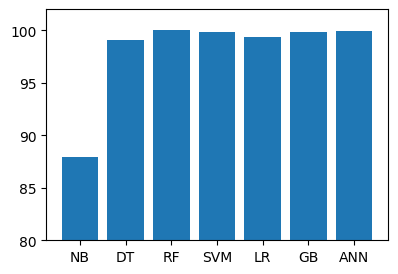

In [67]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.95,99.06,99.99,99.86,99.35,99.79,99.91]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [67]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 7 artists>

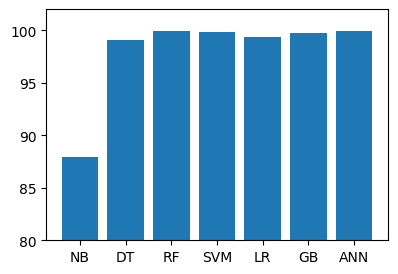

In [68]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,99.886]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [69]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

# Features importance 

In [48]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming you have already defined and loaded your X_train and Y_train

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rfc.fit(X_train, Y_train.values.ravel())

# Get feature importance scores
feature_importances = rfc.feature_importances_
feature_importances

# Convert X_train (numpy array) to a DataFrame
# X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Create a DataFrame with feature names and their corresponding importances
# imp_feature = pd.DataFrame({'feature importance': feature_importances}, index=X_train_df.columns)
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature

# Display the DataFrame
print(imp_feature)


                             feature importance
duration                               0.006958
protocol_type                          0.064594
flag                                   0.017815
src_bytes                              0.042823
dst_bytes                              0.145007
land                                   0.000053
wrong_fragment                         0.003756
urgent                                 0.000016
hot                                    0.006433
num_failed_logins                      0.000150
logged_in                              0.131715
num_compromised                        0.006987
root_shell                             0.000074
su_attempted                           0.000006
num_file_creations                     0.000090
num_shells                             0.000020
num_access_files                       0.000049
num_outbound_cmds                      0.000000
is_host_login                          0.000000
is_guest_login                         0

In [ ]:
from sklearn.svm import SVC

import pandas as pd

# Assuming you have already defined and loaded your X_train and Y_train

svc = SVC(gamma = 'scale')

# Fit the model to the training data
svc.fit(X_train, Y_train.values.ravel())

# Get feature importance scores
feature_importances = svc.feature_importances_
feature_importances

# Convert X_train (numpy array) to a DataFrame
# X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Create a DataFrame with feature names and their corresponding importances
# imp_feature = pd.DataFrame({'feature importance': feature_importances}, index=X_train_df.columns)
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature

# Display the DataFrame
print(imp_feature)


In [49]:
imp_feature=imp_feature[imp_feature['feature importance']>0.04]
b=imp_feature.sort_values('feature importance')
b.index

Index(['dst_host_srv_diff_host_rate', 'src_bytes', 'diff_srv_rate',
       'srv_count', 'protocol_type', 'dst_host_count', 'logged_in',
       'dst_bytes', 'count'],
      dtype='object')

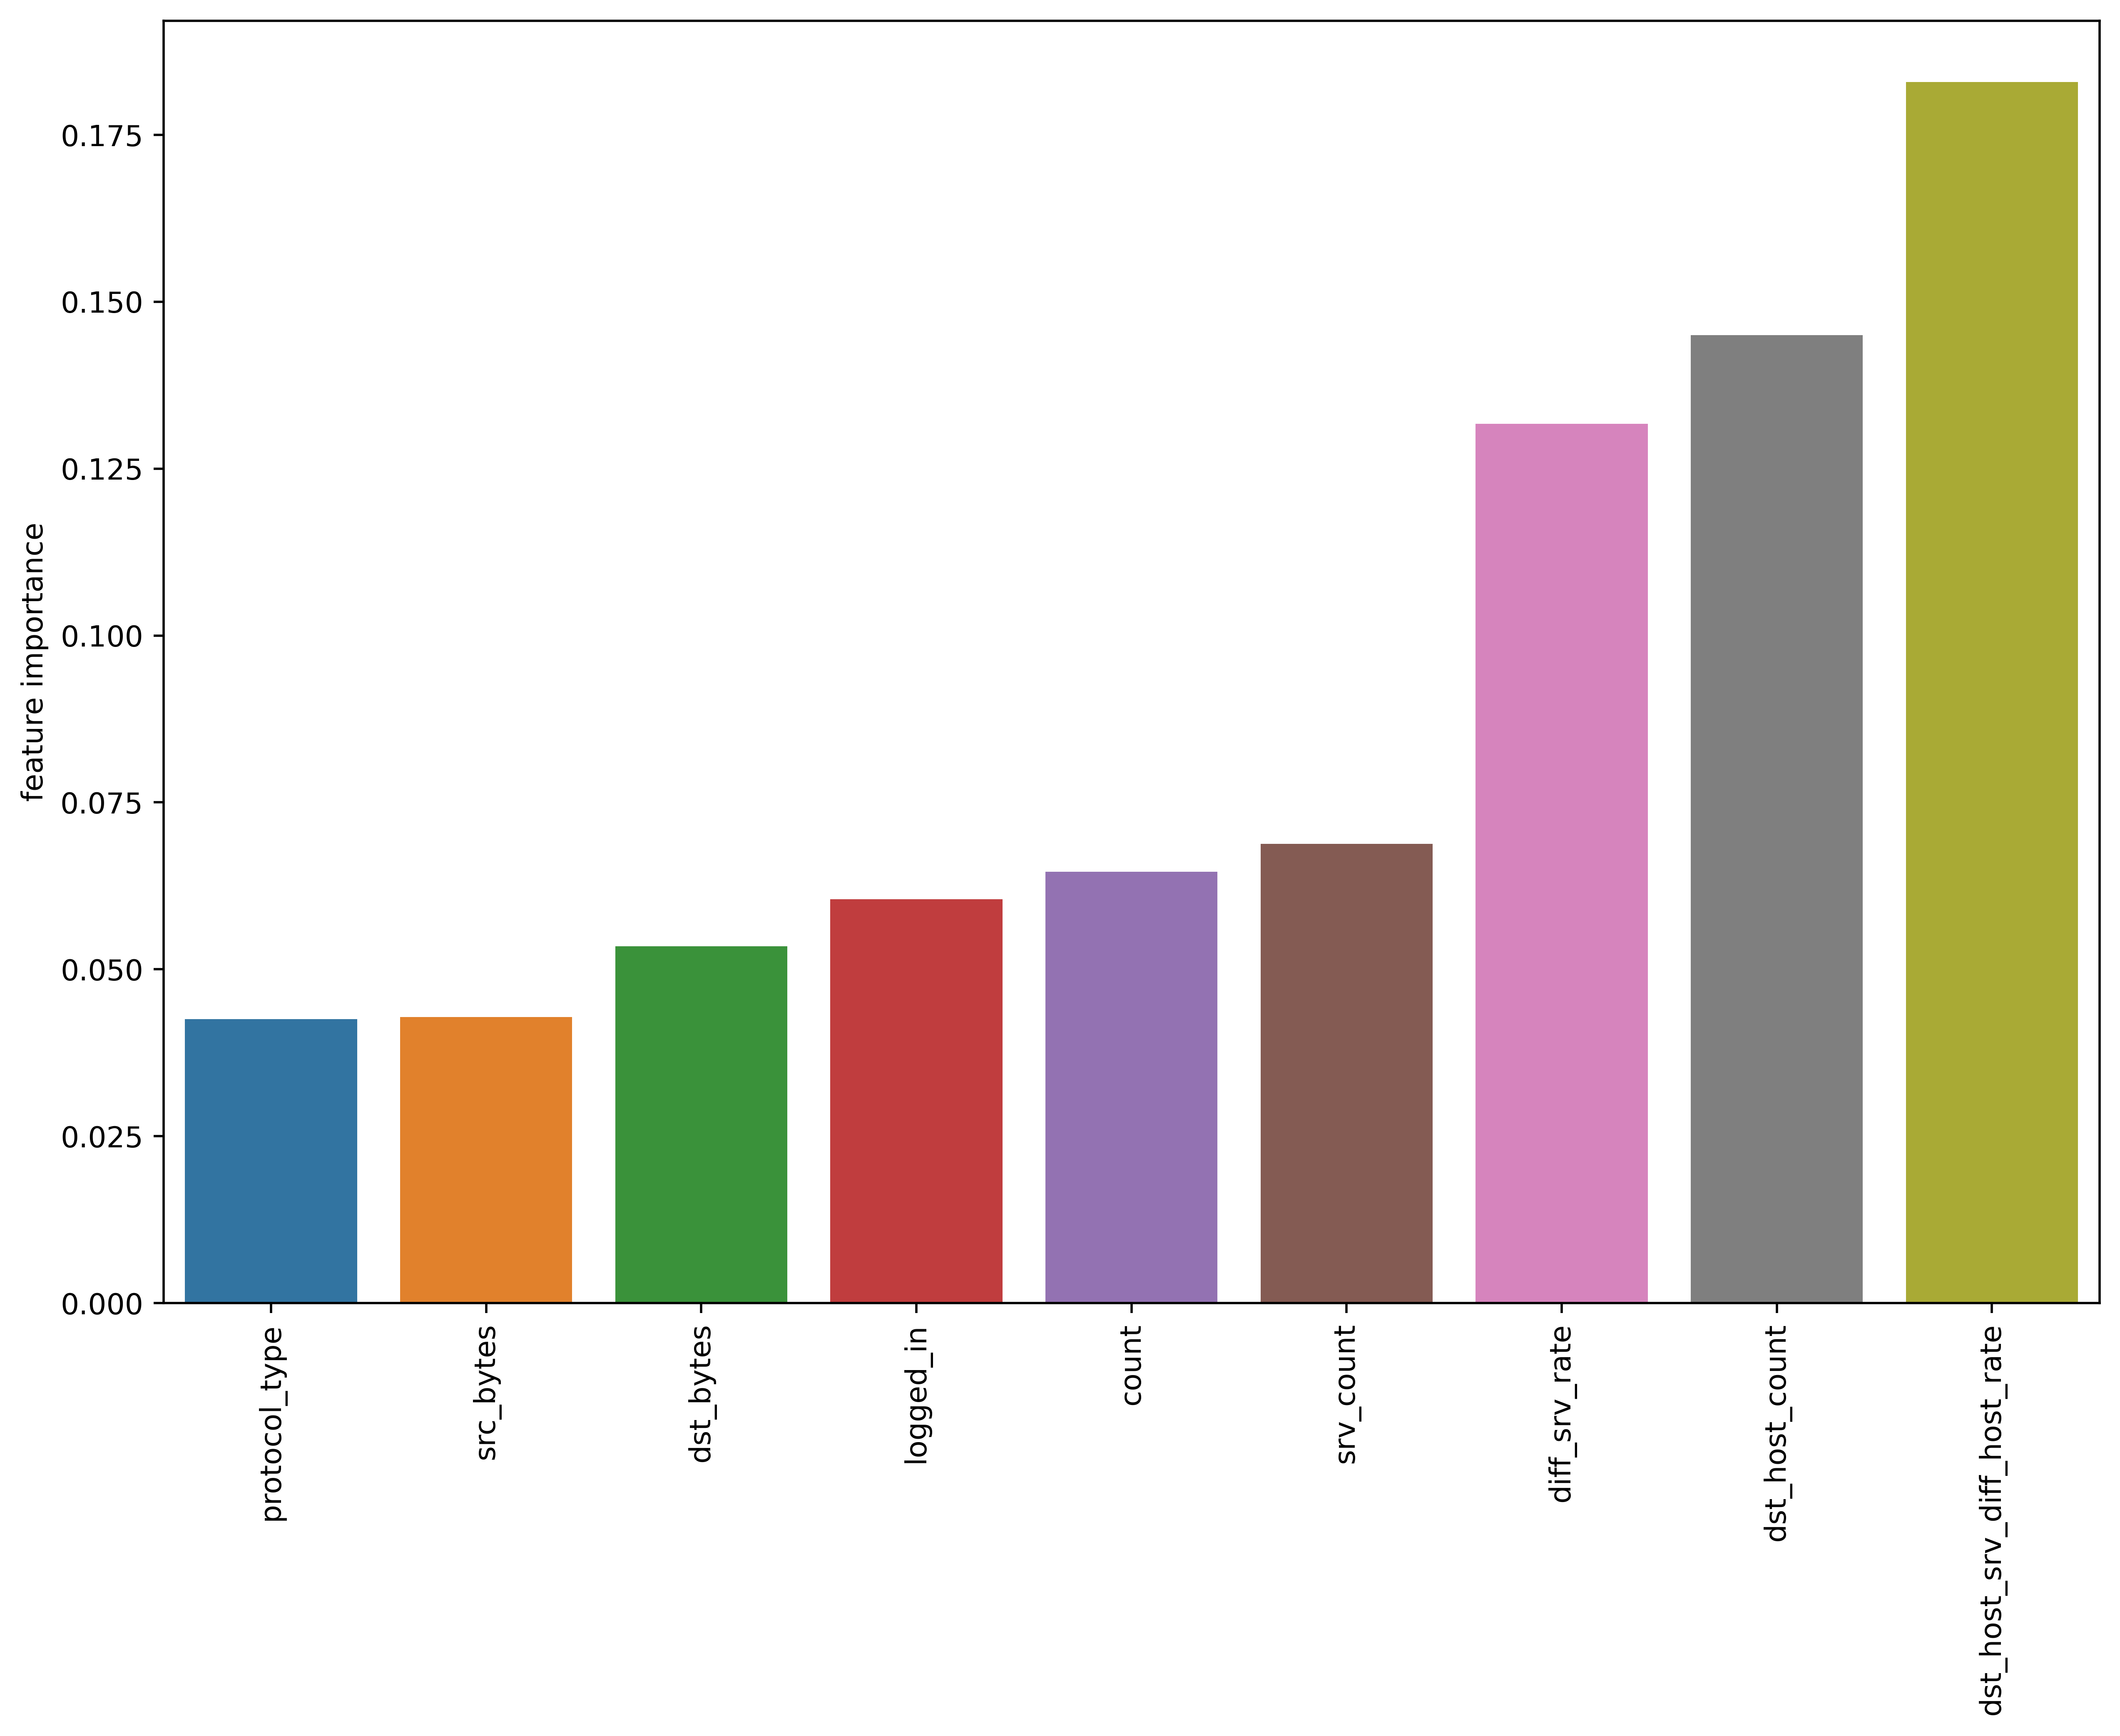

In [50]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [51]:
X=X[['diff_srv_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_same_src_port_rate', 'srv_count', 'protocol_type',
       'dst_host_count', 'logged_in', 'dst_bytes', 'count']]

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [64]:
X_train

,diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_same_src_port_rate,srv_count,protocol_type,dst_host_count,logged_in,dst_bytes,count
228201,0.00,0.00,1.00,511,0,255,0,0,511
483696,0.00,0.06,0.03,1,1,32,1,3415,1
234556,0.00,0.00,1.00,510,0,255,0,0,510
127627,0.07,0.00,0.00,13,1,255,0,0,242
463534,0.07,0.00,0.00,7,1,255,0,0,211
...,...,...,...,...,...,...,...,...,...
259178,0.00,0.00,1.00,511,0,255,0,0,511
365838,0.07,0.00,0.00,5,1,255,0,0,105
131932,0.00,0.00,1.00,511,0,255,0,0,511
146867,0.00,0.00,0.84,1,2,255,0,105,1


In [55]:
X_test.to_csv("testing.csv",index=False)

# best model 

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train.values.ravel())
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)


#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9988327137044809
train accuracy: 0.9997223941193821
********************
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    117394
      normal       1.00      1.00      1.00     29192
       probe       0.99      0.96      0.97      1255
         r2l       0.96      0.93      0.94       349
         u2r       0.17      0.06      0.09        17

    accuracy                           1.00    148207
   macro avg       0.82      0.79      0.80    148207
weighted avg       1.00      1.00      1.00    148207

********************
99.88% Accurate


In [77]:
import pickle

In [6]:
#save the model
model = model2  # Your machine learning model object
file_path = 'dt.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

NameError: name 'model2' is not defined

In [78]:
#save the model
model = rfc  # Your machine learning model object
file_path = 'rfc.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [56]:
# load the model
import pickle
file_path = 'rfc.pkl'  # Path to the saved model file
with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [62]:
X_train.to_csv('training.csv',index=False)

## user input prediction

In [58]:
loaded_model.predict([[0.00,0.00,1.00,511,0,200,0,0,300]])

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['dos'], dtype=object)

In [59]:
loaded_model.predict([[0.5,0.04,0.05,5,1,179,0,0,8]])

# diff_srv_rate', 'dst_host_srv_diff_host_rate',
#        'dst_host_same_src_port_rate', 'srv_count', 'protocol_type',
#        'dst_host_count', 'logged_in', 'dst_bytes', 'count'

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['normal'], dtype=object)

In [65]:
loaded_model.predict([[0.0,0.0,1.0,511,0,255,0,0,511]])


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['dos'], dtype=object)

In [61]:
loaded_model.predict([[0.0,0.0,1.0,1,2,255,0,105,1]])

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['normal'], dtype=object)

In [82]:
Y.value_counts()

Attack Type
dos            391458
normal          97278
probe            4107
r2l              1126
u2r                52
Name: count, dtype: int64